In [1]:
import os
import numpy as np
import copy
import matplotlib.pyplot as plt

In [918]:
def round_to_int(x):
    x0 = int(x)+1
    return x0

def weight_l(k, n_l, n_h):
    i_loc = np.array([s for s in range(n_l, n_h + 1) if s != k])
    return np.prod(i_loc + 1/2) / np.prod(i_loc - k)

def D_range_corr(Ind, n, s, N_range):
    #print(N_range)
    N_range_corr = Ind + s * (2 * N_range + 1)
    #print(N_range_corr)
    N_range_corr = N_range_corr + max(0, N_range_corr[0]) - \
            N_range_corr[0]
    #print(N_range_corr)
    N_range_corr = N_range_corr + min(n - 1, N_range_corr[-1]) - \
            N_range_corr[-1]
    #print(N_range_corr)
    N_range_corr = ((N_range_corr[N_range_corr >= 0] - Ind)/s - 1) / 2
    #print(N_range_corr)
    return np.array([round_to_int(s) for s in N_range_corr])

def C_range_corr(Ind, n, s, N_range):
    N_range_corr = Ind + s * (2 * N_range + 1)
    print(N_range_corr)
    N_range_corr = N_range_corr + max(s, N_range_corr[0]) - \
            N_range_corr[0]
    print(N_range_corr)
    N_range_corr = N_range_corr + min(n-1-s, N_range_corr[-1]) - \
            N_range_corr[-1]
    print(N_range_corr)
    N_range_corr = ((N_range_corr[N_range_corr >= 0] - Ind) / s - 1) / 2
    print(N_range_corr)
    return np.array([round_to_int(s) for s in N_range_corr])

In [116]:
C_range_corr(0, 16, 1, np.arange(-8, 8))

[-15 -13 -11  -9  -7  -5  -3  -1   1   3   5   7   9  11  13  15]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31]
[-16 -14 -12 -10  -8  -6  -4  -2   0   2   4   6   8  10  12  14]
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5]


array([1, 1, 2, 3, 4, 5, 6, 7])

In [122]:
# forward
def forward_wavelet_transform(y, jlvls, order):
    ende = len(y)
    n_range = np.arange(-int((order+1)/2), int((order+1)/2))
    
    for j in range(jlvls-1, -1, -1):
        s = 2**(jlvls-1-j)
        
        D_ind = np.arange(s, ende, 2 * s)
        C_ind = np.arange(0, ende, 2 * s)
        
        # PREDICT
        for i in D_ind:
            n_range_corr = D_range_corr(i, ende, s, n_range)
            order_corr = len(n_range_corr) - 1
            #print(i, n_range_corr)
            #if len(np.unique(n_range_corr)) == len(n_range_corr):
            #    1/0
            if i + (2*n_range_corr[order_corr]+1)*s > len(y)-1:
                break
            for k in range(order_corr + 1):
                y[i] = y[i] - y[i + (2*n_range_corr[k]+1)*s] * \
                    weight_l(n_range_corr[k], n_range_corr[0], \
                        n_range_corr[order_corr])
        
        # UPDATE
        for i in C_ind:
            n_range_corr = C_range_corr(i, ende, s, n_range)
            order_corr = len(n_range_corr) - 1
            if i + (2*n_range_corr[order_corr]+1)*s > len(y)-1:
                break
            for k in range(order_corr + 1):
                y[i] = y[i] + 0.5*y[i + (2*n_range_corr[k]+1)*s] * \
                    weight_l(n_range_corr[k], n_range_corr[0], \
                        n_range_corr[order_corr])
                
    return y

def inverse_wavelet_transform(y, jlvls, order):
    for j in range(jlvls-1):

In [123]:
forward_wavelet_transform(np.arange(128), 4, 4)

[-3 -1  1  3]
[1 3 5 7]
[1 3 5 7]
[0. 1. 2. 3.]
[-1  1  3  5]
[1 3 5 7]
[1 3 5 7]
[-1.  0.  1.  2.]
[1 3 5 7]
[1 3 5 7]
[1 3 5 7]
[-2. -1.  0.  1.]
[3 5 7 9]
[3 5 7 9]
[3 5 7 9]
[-2. -1.  0.  1.]
[ 5  7  9 11]
[ 5  7  9 11]
[ 5  7  9 11]
[-2. -1.  0.  1.]
[ 7  9 11 13]
[ 7  9 11 13]
[ 7  9 11 13]
[-2. -1.  0.  1.]
[ 9 11 13 15]
[ 9 11 13 15]
[ 9 11 13 15]
[-2. -1.  0.  1.]
[11 13 15 17]
[11 13 15 17]
[11 13 15 17]
[-2. -1.  0.  1.]
[13 15 17 19]
[13 15 17 19]
[13 15 17 19]
[-2. -1.  0.  1.]
[15 17 19 21]
[15 17 19 21]
[15 17 19 21]
[-2. -1.  0.  1.]
[17 19 21 23]
[17 19 21 23]
[17 19 21 23]
[-2. -1.  0.  1.]
[19 21 23 25]
[19 21 23 25]
[19 21 23 25]
[-2. -1.  0.  1.]
[21 23 25 27]
[21 23 25 27]
[21 23 25 27]
[-2. -1.  0.  1.]
[23 25 27 29]
[23 25 27 29]
[23 25 27 29]
[-2. -1.  0.  1.]
[25 27 29 31]
[25 27 29 31]
[25 27 29 31]
[-2. -1.  0.  1.]
[27 29 31 33]
[27 29 31 33]
[27 29 31 33]
[-2. -1.  0.  1.]
[29 31 33 35]
[29 31 33 35]
[29 31 33 35]
[-2. -1.  0.  1.]
[31 33 35 37]
[31 33 35 

array([  3,   0,   1,   0,   1,   0,   0,   0,   0,   0,  -1,  -1,  -1,
         0,   0,  -1,  12,   0,   0,   0,   0,   0,  -1,   0,  -1,   0,
        -2,  -1,  -1,   0,   0,  -1,  26,   0,   0,   0,   0,   0,  -1,
         0,  -1,   0,  -2,  -1,  -1,   0,   0,  -1,  46,   0,   0,   0,
         0,   0,  -1,   0,  -1,   0,  -2,  -1,  -1,   0,   0,  -1,  46,
         0,   0,   0,   0,   0,  -1,   0,  -7,   0,  -2,  -1,  -1,   0,
         0,  -1,  99,   0,   0,   0,   0,   0,  -1,   0,  89,   0,  -2,
        -1,   0,   0,   0,  -1, 120,   0,   0,   0,  -6,   0,  -1,   0,
       133,   0,  -2,  -1, 110,   0,   0,  -1, 144,   0,  -8,   0, 147,
         0, 121,   0, 169,   0, 162, 123, 177, 125, 126, 127])

In [125]:
################################# NEW ITERATION, INTERVAL

In [250]:
def wgh(k, n_l, n_h):
    array = np.arange(n_l, n_h+1)
    i0 = array[array != k]
    return np.prod(i0+0.5) / np.prod(i0-k)

def D_range_corr(Ind, n, s, N_range):
    N_range_corr = Ind + s * (2 * N_range + 1)
    N_range_corr = N_range_corr + max(0, N_range_corr[0]) - \
                    N_range_corr[0]
    N_range_corr = N_range_corr + min(n-1, N_range_corr[-1]) - \
                    N_range_corr[-1]
    N_range_corr = ((N_range_corr[N_range_corr > 0] - Ind) / s - 1)/2
    return np.array([round_to_int(s) for s in N_range_corr])

def C_range_corr(Ind, n, s, N_range):
    N_range_corr = Ind + s*(2*N_range+1)
    N_range_corr = N_range_corr + max(s, N_range_corr[0]) - \
                    N_range_corr[0]
    N_range_corr = N_range_corr + min(n-s-1, N_range_corr[-1]) - \
                    N_range_corr[-1]
    N_range_corr = ((N_range_corr[N_range_corr>0] - Ind)/s-1)/2
    return np.array([round_to_int(s) for s in N_range_corr])
    
def forward_wt(y, jlvl, order):
    coeffs_storage = []
    ende = len(y)
    n_range = np.arange(-int((order+1)/2), int((order+1)/2))
    
    for j in range(jlvl-1, -1, -1):
        s = 2**(jlvl - j - 1)
        D_ind = np.arange(s, ende, 2*s)
        C_ind = np.arange(0, ende, 2*s)
        for i in D_ind:
            n_range_corr = D_range_corr(i, ende, s, n_range).astype(int)
            order_corr = len(n_range_corr) - 1
            if i + (2*n_range_corr[order_corr]+1)*s > len(y)-1:
                break

            for k in range(order_corr + 1):
                #print(i, int(i + (2*n_range_corr[k]+1)*s))
                y[i] = y[i] - y[int(i + (2*n_range_corr[k]+1)*s)]*\
                        wgh(n_range_corr[k], n_range_corr[0], \
                           n_range_corr[order_corr])
                
        for i in C_ind:
            n_range_corr = C_range_corr(i, ende, s, n_range).astype(int)
            order_corr = len(n_range_corr) - 1
            if i + (2*n_range_corr[order_corr]+1)*s > len(y)-1:
                break

            for k in range(1, order_corr+1):
                y[i] = y[i] + 0.5 * y[int(i+(2*n_range_corr[k]+1)*s)]*\
                        wgh(n_range_corr[k], n_range_corr[0], \
                            n_range_corr[order_corr])
        
        coeffs_storage.append(copy.deepcopy(y))
        
    return y, coeffs_storage


def inverse_wt(y, jlvl, order):
    coeffs_storage = []
    ende = len(y)
    n_range = np.arange(-int((order+1)/2), int((order+1)/2))

    for j in range(0, jlvl-1):
        s = 2**(jlvl-j-1)
        
        D_ind = np.arange(s, ende, 2*s)
        C_ind = np.arange(0, ende, 2*s)
        
        for i in C_ind:
            n_range_corr = C_range_corr(i, ende, s, n_range)
            order_corr = len(n_range_corr) - 1
            if i + (2*n_range_corr[order_corr]+1)*s > len(y)-1:
                break

            for k in range(order_corr+1):
                y[i] = y[i] - 0.5 * y[i+(2*n_range_corr[k]+1)*s]*\
                        wgh(n_range_corr[k], n_range_corr[0], \
                            n_range_corr[order_corr])
                
        for i in D_ind:
            n_range_corr = D_range_corr(i, ende, s, n_range)
            order_corr = len(n_range_corr) - 1
            if i + (2*n_range_corr[order_corr]+1)*s > len(y)-1:
                break

            for k in range(order_corr+1):
                y[i] = y[i] + y[int(i + (2*n_range_corr[k]+1)*s)]*\
                        wgh(n_range_corr[k], n_range_corr[0], \
                           n_range_corr[order_corr])
                
    return y

In [251]:
y_ = 1./(1.5+np.sin(1.3*np.pi*np.arange(0.1, 3., 0.01)))

In [252]:
y_ = 1./(1.5+np.sin(1.3*np.pi*np.arange(0.1, 3., 0.01)))
ans0, ans1 = forward_wt(y, 4, 5)
y_ref = inverse_wt(copy.deepcopy(ans1), 4, 5)

IndexError: index -1 is out of bounds for axis 0 with size 0

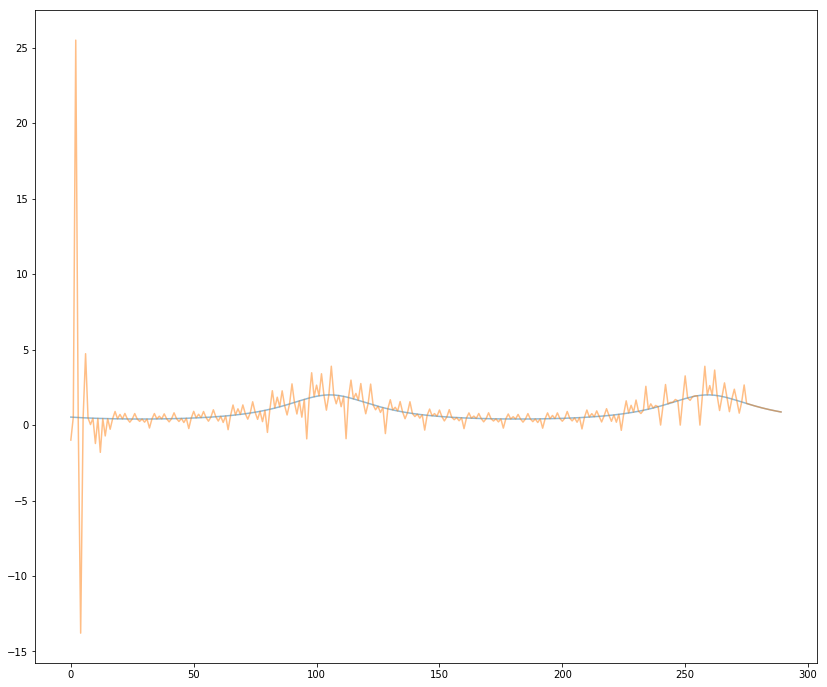

In [239]:
plt.figure(figsize=(14,12))
plt.plot(y_, alpha=0.5)
plt.plot(y_ref, alpha=0.5)
plt.show()

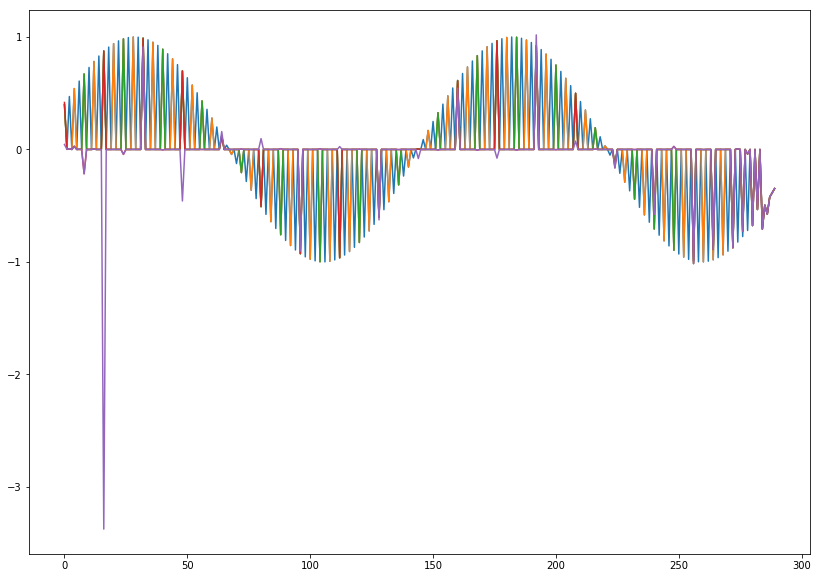

In [201]:
plt.figure(figsize=(14,10))
for i in range(len(ans1)):
    plt.plot(ans1[i])
plt.show()

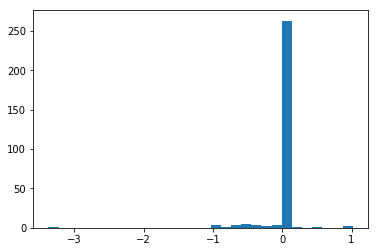

In [204]:
plt.hist(ans1[-1], bins=30)
plt.show()

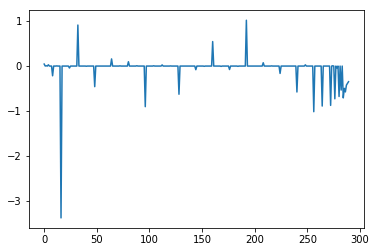

In [198]:
plt.plot(y)

In [379]:
order = 4
n_range = np.arange(-int((order+1)/2), order-int((order+1)/2))
print(n_range)

[-2 -1  0  1]


In [484]:
order = 3
np.arange(-int((order+1)/2), order-int((order+1)/2)+1)

array([-2, -1,  0,  1])

In [919]:
############################## NEW LOOP, Forward/backward
def wgh_spec(k0, n_l, n_h):
    array = np.arange(n_l, n_h+1)
    print(array)
    i0 = array[array != k0]
    print(np.prod(i0+0.5) / np.prod(i0-k0))
    return np.prod(i0+0.5) / np.prod(i0-k0)

def wgh(k0, n_l, n_h):
    array = np.arange(n_l, n_h+1)
    i0 = array[array != k0]
    return np.prod(i0+0.5) / np.prod(i0-k0)

def D_range_corr(Ind, n, s, N_range):
    N_range_corr = Ind + s * (2*N_range+1)
    N_range_corr = N_range_corr + max(0, N_range_corr[0]) - \
                    N_range_corr[0]
    N_range_corr = N_range_corr + min(n-1, N_range_corr[-1]) - \
                    N_range_corr[-1]
    N_range_corr = ((N_range_corr[N_range_corr>=0] - Ind)/s -1)/2
    return N_range_corr

def C_range_corr(Ind, n, s, N_range):
    N_range_corr = Ind + s*(2*N_range+1)
    N_range_corr = N_range_corr + max(s, N_range_corr[0]) - \
                    N_range_corr[0]
    N_range_corr = N_range_corr + min(n-s-1, N_range_corr[-1]) - \
                    N_range_corr[-1]
    N_range_corr = ((N_range_corr[N_range_corr>=0] - Ind)/s-1)/2
    return N_range_corr
    
eps = 0.000001
    
def inverse_wt(y, jlvl, order_p, order_u):
    ende = len(y)
    n_range_p = np.arange(-int((order_p+1)/2), order_p-int((order_p+1)/2)+1)
    n_range_u = np.arange(-int((order_u+1)/2), order_u-int((order_u+1)/2)+1)
    print("==========================================================")
    print(n_range_p, n_range_u)
    
    for j in range(1, jlvl):
        s = 2**(jlvl-j-1)
        
        D_ind = copy.deepcopy(np.arange(s, ende, 2*s))
        C_ind = copy.deepcopy(np.arange(0, ende, 2*s))
    
        for i in C_ind:
            n_range_corr = C_range_corr(i, ende, s, \
                                       copy.deepcopy(n_range_u))
            order_corr = len(n_range_corr) - 1
            
            for k in range(order_corr+1):
                y[i] = y[i] - 0.5*y[int(i+(2*n_range_corr[k]+1)*s)]*\
                        wgh(n_range_corr[k], n_range_corr[0], \
                           n_range_corr[order_corr])
                
        for i in D_ind:
            n_range_corr = D_range_corr(i, ende, s, \
                                        copy.deepcopy(n_range_p))
            order_corr = len(n_range_corr) - 1
            #if i + (2*n_range_corr[order_corr]+1)*s > len(y)-1:
            #    break

            for k in range(order_corr+1):
                y[i] = y[i] + y[int(i+(2*n_range_corr[k]+1)*s)]* \
                        wgh(n_range_corr[k], n_range_corr[0], \
                           n_range_corr[order_corr])

    return y
        
    
def forward_wt(y, jlvl, order_p, order_u):
    ende = len(y)
    eps = 0.000000001
    n_range_p = np.arange(-int((order_p+1)/2), order_p-int((order_p+1)/2)+1)
    print(n_range_p)
    plt.figure(figsize=(14,14))
    plt.subplot(211)
    plt.plot(y)
    
    for j in range(jlvl-1, 0, -1):
        s = 2**(jlvl-j-1)
        print(s, "==========")
        D_ind = copy.deepcopy(np.arange(s, ende, 2*s))
        C_ind = copy.deepcopy(np.arange(0, ende, 2*s))
        
        # predict stage
        for i in D_ind:
            n_range_corr = D_range_corr(i, ende, s, \
                                        copy.deepcopy(n_range_p))
            order_corr = len(n_range_corr) - 1
            #if i + (2*n_range_corr[order_corr]+1)*s > len(y)-1:
            #    break
            print(i, n_range_corr, order_corr)

            print(y[i], "y["+str(i)+"] ======================== =============")
            for k in range(order_corr+1):
                yi_old = copy.deepcopy(y[i])
                print(k, "==========")
                print(y[i], y[int(i+(2*n_range_corr[k]+1)*s)])
                y[i] = y[i] - y[int(i+(2*n_range_corr[k]+1)*s)]* \
                        wgh(n_range_corr[k], n_range_corr[0], n_range_corr[order_corr])
                print("wgh", wgh(n_range_corr[k], n_range_corr[0], n_range_corr[order_corr]))
                #print(n_range_corr[k], n_range_corr[0], n_range_corr[order_corr])
                #print(yi_old, y[i], y[int(i+(2*n_range_corr[k]+1)*s)])
                print(y[i], "y["+str(i)+"] ======================== =============", \
                     i+(2*n_range_corr[k]+1)*s, int(i+(2*n_range_corr[k]+1)*s))
                
        plt.subplot(212)
        mask = np.array([k%2 for k in range(len(y))])
        plt.plot(y * mask)
        plt.grid()
        #plt.show()
        

        # update stage
        n_range_u = np.arange(-int((order_u+1)/2), order_u-int((order_u+1)/2)+1)
        for i in C_ind:
            #print(n_range)
            n_range_corr = C_range_corr(i, ende, s, \
                                        copy.deepcopy(n_range_u))
            #print(n_range_corr, i, ende, s)
            #1/0
            order_corr = len(n_range_corr) - 1
            #if i + (2*n_range_corr[order_corr]+1)*s > len(y)-1:
            #    break

            for k in range(order_corr+1):
                y[i] = y[i] + 0.5*y[int(i+(2*n_range_corr[k]+1)*s)]*\
                        wgh(n_range_corr[k], n_range_corr[0], \
                           n_range_corr[order_corr])
                """
                if y[i] > 10000:
                    print(0.5*y[int(i+(2*n_range_corr[k])*s)], \
                          wgh(n_range_corr[k], n_range_corr[0], \
                           n_range_corr[order_corr]), y[i], i)
                    print(n_range_corr[k], n_range_corr[0], \
                           n_range_corr[order_corr])
                    wgh_spec(n_range_corr[k], n_range_corr[0], \
                           n_range_corr[order_corr])
                    1/0
                """
        plt.subplot(211)
        #plt.plot(y)
        plt.grid()
        
        #plt.show()
        #1/0
                
    return y

[-2 -1  0  1]
1 ==========
BEGIN [-2 -1  0  1]
1 [-2  0  2  4]
2 [0 2 4 6]
3 [0 2 4 6]
END [-1.  0.  1.  2.]
1 [-1.  0.  1.  2.] 3
-59049.0 y[1] ======================== =============
0 ==========
-59049.0 -100000.0
wgh 0.3125
-27799.0 y[1] ======================== ============= 0.0 0
1 ==========
-27799.0 -32768.0
wgh 0.9375
2921.0 y[1] ======================== ============= 2.0 2
2 ==========
2921.0 -7776.0
wgh -0.3125
491.0 y[1] ======================== ============= 4.0 4
3 ==========
491.0 -1024.0
wgh 0.0625
555.0 y[1] ======================== ============= 6.0 6
BEGIN [-2 -1  0  1]
1 [0 2 4 6]
2 [0 2 4 6]
3 [0 2 4 6]
END [-2. -1.  0.  1.]
3 [-2. -1.  0.  1.] 3
-16807.0 y[3] ======================== =============
0 ==========
-16807.0 -100000.0
wgh -0.0625
-23057.0 y[3] ======================== ============= 0.0 0
1 ==========
-23057.0 -32768.0
wgh 0.5625
-4625.0 y[3] ======================== ============= 2.0 2
2 ==========
-4625.0 -7776.0
wgh 0.5625
-251.0 y[3] =================

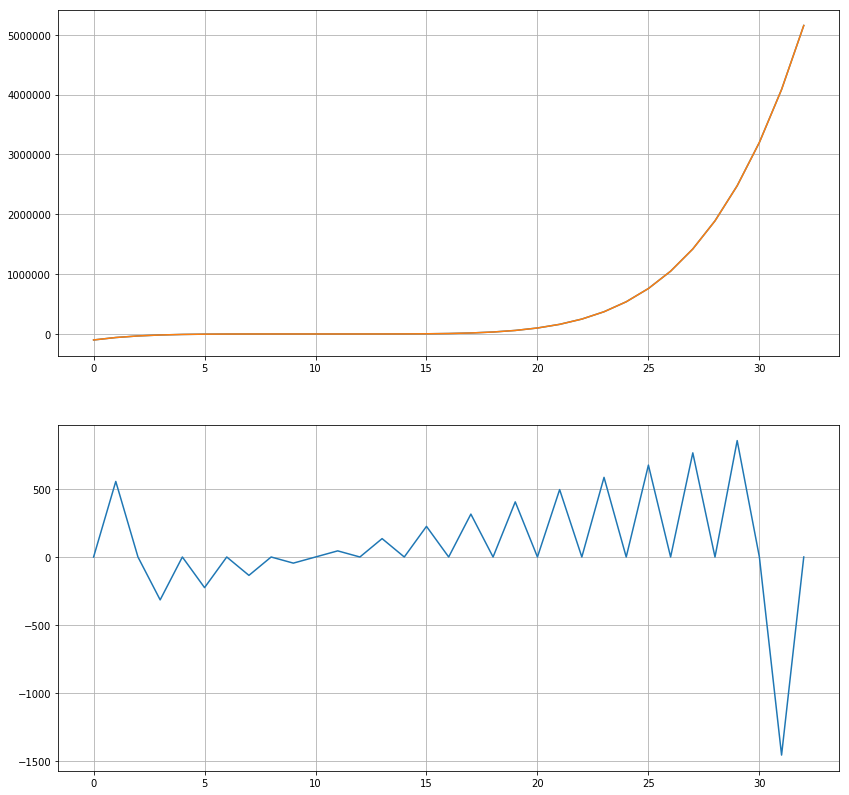

In [921]:
poly = lambda x: (x-10)**5
#x**3 - 2*x 
#y_ = np.ones((32,))
y_ = poly(np.arange(0, 33)).astype(float)#[:256])
#y_ = 1./(1.5+np.sin(1.3*np.pi*np.arange(0.1, 3., 0.01)[:256]))
ans1 = forward_wt(copy.deepcopy(y_), 2, 3, 0)
y_ref = inverse_wt(copy.deepcopy(ans1), 2, 3, 0)
plt.subplot(211)
plt.plot(y_ref)

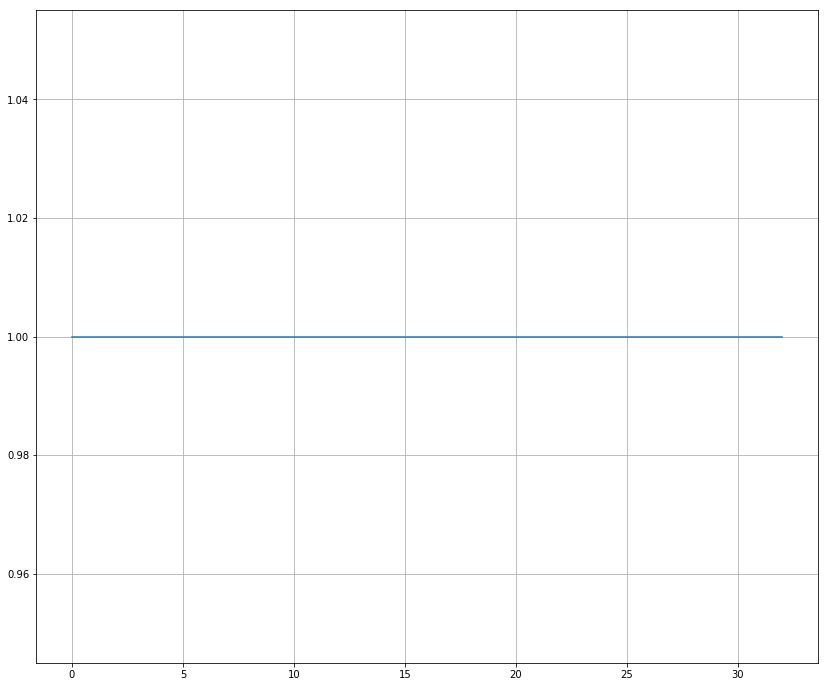

In [896]:
plt.figure(figsize=(14,12))
plt.plot(y_)
#plt.plot(y_ref)
#plt.ylim(-0.3, 2.3)
plt.grid()
plt.show()

In [922]:
########################## NEW ITERATION #########################

In [7]:
def wgh(k0, n_l, n_h):
    array = np.arange(n_l, n_h + 1)
    i0 = array[array != k0].astype(np.float64)
    return np.prod(i0 + 0.5) / np.prod(i0 - k0)

def D_range_corr(Ind, n, s, N_range):
    N_range_corr = Ind + s * (2 * N_range + 1)
    N_range_corr = N_range_corr + max(0, N_range_corr[0]) - \
                    N_range_corr[0]
    N_range_corr = N_range_corr + min(n-1, N_range_corr[-1]) - \
                    N_range_corr[-1]
    N_range_corr = ((N_range_corr[N_range_corr>=0]-Ind)/s-1)/2
    return N_range_corr

def C_range_corr(Ind, n, s, N_range):
    N_range_corr = Ind + s * (2 * N_range + 1)
    N_range_corr = N_range_corr + max(s, N_range_corr[0]) - \
                    N_range_corr[0]
    N_range_corr = N_range_corr + min(n-s-1, N_range_corr[-1]) - \
                    N_range_corr[-1]
    N_range_corr = ((N_range_corr[N_range_corr>=0]-Ind)/s-1)/2
    return N_range_corr

def forward_wt(y, jlvl, order_p, order_u, cv):
    #(y, jlvl, order_p, order_u, cv):
    y0 = copy.deepcopy(y)
    n_range_p = np.arange(-int((order_p+1)/2), \
                order_p-int((order_p+1)/2)+1).astype(np.float64)
    n_range_u = np.arange(-int((order_u+1)/2), \
                order_u-int((order_u+1)/2)+1).astype(np.float64)
    ende = len(y)

    for j in range(jlvl-1, 0, -1):
        s = 2**(jlvl-j-1)
        D_ind = np.arange(s, ende, 2*s)
        C_ind = np.arange(0, ende, 2*s)
        
        # predict
        for i in D_ind:
            range_corr = D_range_corr(i, ende, s, n_range_p).astype(np.float64)
            order_corr = len(range_corr) - 1
            for k in range(order_corr+1):
                y[i] = y[i] - y[int(i+(2*range_corr[k]+1)*s)]*\
                    wgh(range_corr[k], range_corr[0], range_corr[-1])
        
        # update
        for i in C_ind:
            range_corr = C_range_corr(i, ende, s, n_range_u).astype(np.float64)
            order_corr = len(range_corr) - 1
            for k in range(order_corr+1):
                y[i] = y[i] + 0.5*y[int(i+(2*range_corr[k]+1)*s)]*\
                    wgh(range_corr[k], range_corr[0], range_corr[-1])
        
    non_zero = np.sum(np.abs(y) >= cv * np.max(np.abs(y0)))
    y[np.abs(y) < cv * np.max(np.abs(y0))] = 0.

    return y, non_zero

def inverse_wt(y, jlvl, order_p, order_u):
    n_range_p = np.arange(-int((order_p+1)/2), \
                order_p-int((order_p+1)/2)+1).astype(np.float64)
    n_range_u = np.arange(-int((order_u+1)/2), \
                order_u-int((order_u+1)/2)+1).astype(np.float64)
    ende = len(y)
    
    for j in range(1, jlvl):
        s = 2**(jlvl-j-1)
        
        D_ind = np.arange(s, ende, 2*s)
        C_ind = np.arange(0, ende, 2*s)
        
        # update
        for i in C_ind:
            range_corr = C_range_corr(i, ende, s, n_range_u).astype(np.float64)
            order_corr = len(range_corr) - 1
            for k in range(order_corr+1):
                y[i] = y[i] - 0.5*y[int(i+(2*range_corr[k]+1)*s)]*\
                    wgh(range_corr[k], range_corr[0], range_corr[-1])

        # predict
        for i in D_ind:
            range_corr = D_range_corr(i, ende, s, n_range_p).astype(np.float64)
            order_corr = len(range_corr) - 1
            for k in range(order_corr+1):
                y[i] = y[i] + y[int(i+(2*range_corr[k]+1)*s)]*\
                    wgh(range_corr[k], range_corr[0], range_corr[-1])

                
    return y
"""
def get_significance(y, cv, jlvl):
    signif_ = np.zeros((len(y),), dtype=bool)
    for j in range(jlvl-1, 0, -1):
        s = 2**(jlvl-j-1)
        
        D_ind = np.arange(s, len(y), 2*s)
        C_ind = np.arange(0, len(y), 2*s)
        signif_[D_ind] = np.abs(y[D_ind]) >= cv || signif_[D_ind]
        
        if j == 1:
            signif_[C_ind] = True
    return signif_

def get_adjust(y, L_sign, jlvl_in, j_max):
    ende = len(y)
    D_present = np.zeros((jlvl_in,), dtype=bool)
    D_present[0] = True
    for j in range():
    

def adaptive_transform_1d(y, jlvl, order_p, order_u, cv):
    y_forw = forward_wt(y, jlvl, order_p, order_u)
    signif = get_significance(y, cv, jlvl)
"""    

'\ndef get_significance(y, cv, jlvl):\n    signif_ = np.zeros((len(y),), dtype=bool)\n    for j in range(jlvl-1, 0, -1):\n        s = 2**(jlvl-j-1)\n        \n        D_ind = np.arange(s, len(y), 2*s)\n        C_ind = np.arange(0, len(y), 2*s)\n        signif_[D_ind] = np.abs(y[D_ind]) >= cv || signif_[D_ind]\n        \n        if j == 1:\n            signif_[C_ind] = True\n    return signif_\n\ndef get_adjust(y, L_sign, jlvl_in, j_max):\n    ende = len(y)\n    D_present = np.zeros((jlvl_in,), dtype=bool)\n    D_present[0] = True\n    for j in range():\n    \n\ndef adaptive_transform_1d(y, jlvl, order_p, order_u, cv):\n    y_forw = forward_wt(y, jlvl, order_p, order_u)\n    signif = get_significance(y, cv, jlvl)\n'

In [8]:
#func = lambda x: 60*np.sin(x)/(1.+x) +x**3 - np.exp(x*0.7)\
#            -2*x*x + x +20.*np.log(10*x+1)
#func = lambda x: np.sin(x) + np.exp(- 0.1 * ((x-5.)**2) ) 
#lambda x: 1. / (np.sin(x)**2 + 1.1)
func = lambda x: (np.sin(10.*x) + np.exp(- 0.25 * ((x-5.)**2) )).astype(np.float64) 

cvals = (10**np.arange(-1., -7., -1.)).astype(np.float64) #10**np.arange(2, )
err_list = []
nz_list = []
param_j = 10

for c0,cval in enumerate(cvals):
    y_ = func(np.arange(0., 10.001, 10./ 4096.)).astype(np.float64)
    #y_ = np.arange(0., 10.001, 10./ 4096.).astype(np.float64)
    ans_, nz = forward_wt(copy.deepcopy(y_), param_j, 3, 3, cval)
    y_rest = inverse_wt(copy.deepcopy(ans_), param_j, 3, 3)
    
    nz_list.append(copy.deepcopy(nz))
    err_list.append(copy.deepcopy(np.max(np.abs(y_-y_rest))))
    print(c0, len(cvals), err_list[-1])

0 6 0.2440673668440807
1 6 0.0350643477664182
2 6 0.0012796696435177501
3 6 0.0001292503519487731
4 6 1.6296571131936728e-05
5 6 1.2490880635374069e-06


In [1100]:
nz_list

array([  55,  125,  234,  450,  817, 1244])

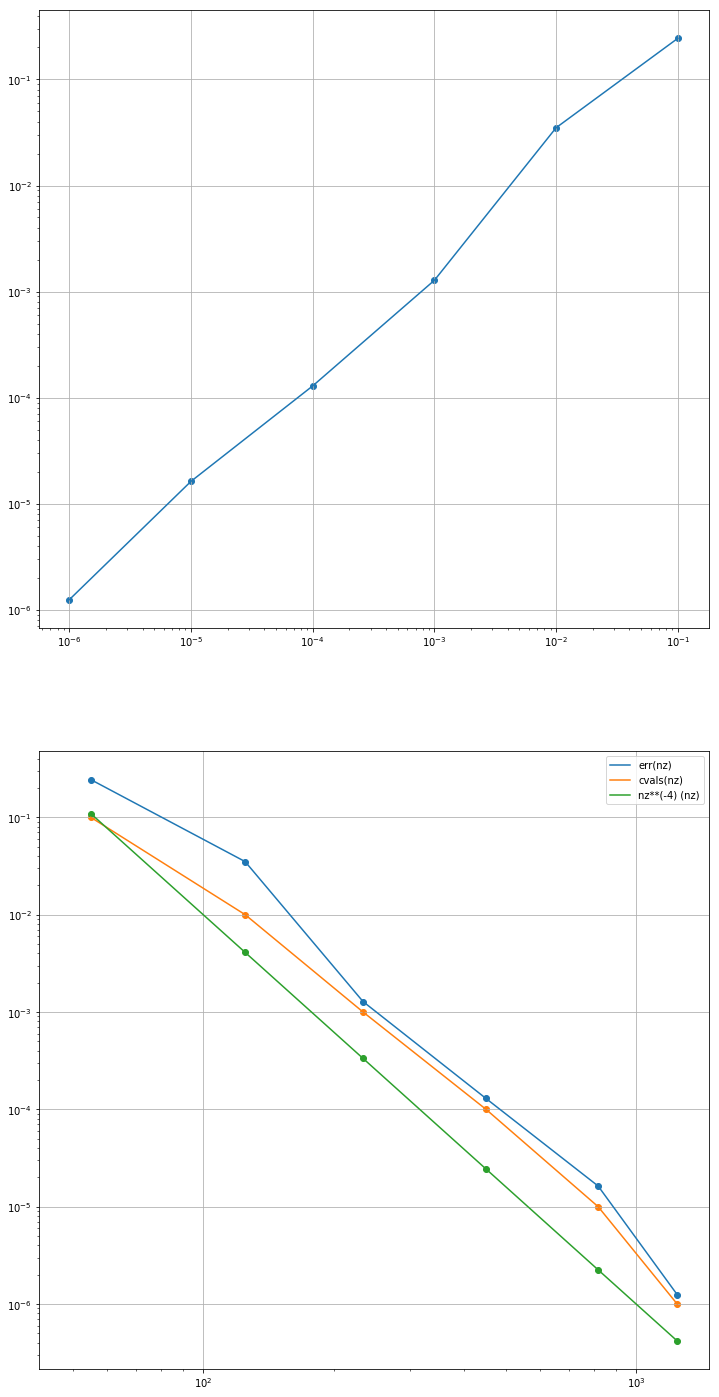

In [1105]:
plt.figure(figsize=(12,25))

nz_list = np.array(nz_list).astype(float)
err_list = np.array(err_list).astype(float)

plt.subplot(211)
plt.plot(cvals, err_list)
plt.scatter(cvals, err_list)

plt.grid()
plt.yscale("log")
plt.xscale("log")

plt.subplot(212)
plt.plot(nz_list, err_list)
plt.scatter(nz_list, err_list)

plt.plot(nz_list, cvals)
plt.scatter(nz_list, cvals)

plt.plot(nz_list, 1000000*nz_list**(-4) )
plt.scatter(nz_list, 1000000*nz_list**(-4))

plt.legend(["err(nz)", "cvals(nz)", "nz**(-4) (nz)"])

plt.grid()

plt.yscale("log")
plt.xscale("log")

plt.show()

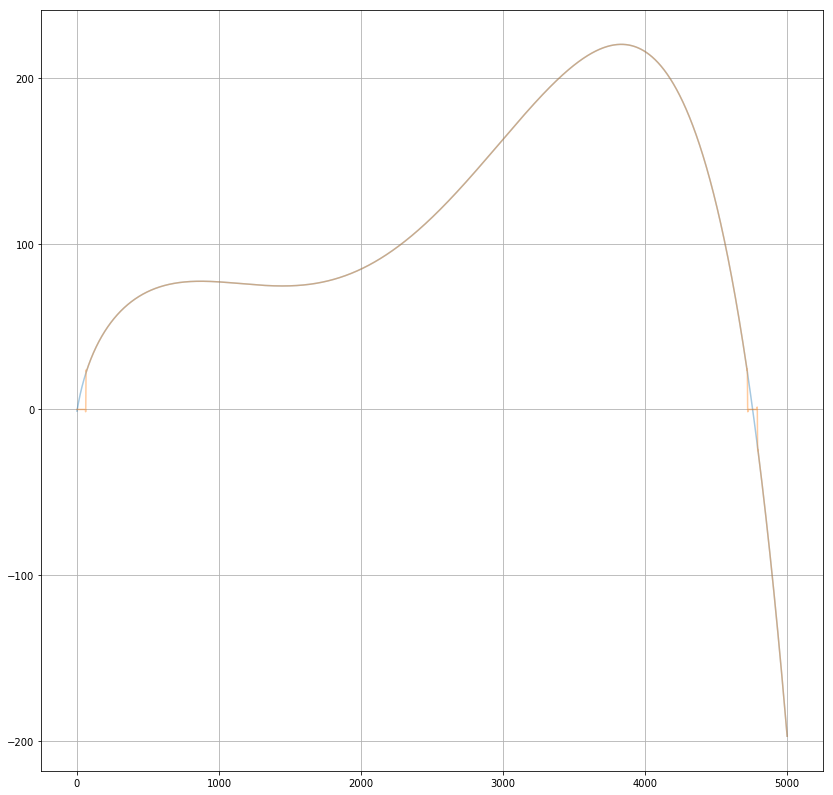

In [1029]:
plt.figure(figsize=(14,14))
plt.plot(y_, alpha=0.4)
plt.plot(y_rest, alpha=0.4)
plt.grid()
plt.show()

In [977]:
np.abs(y_-y_rest)

array([0., 0., 0., ..., 0., 0., 0.])

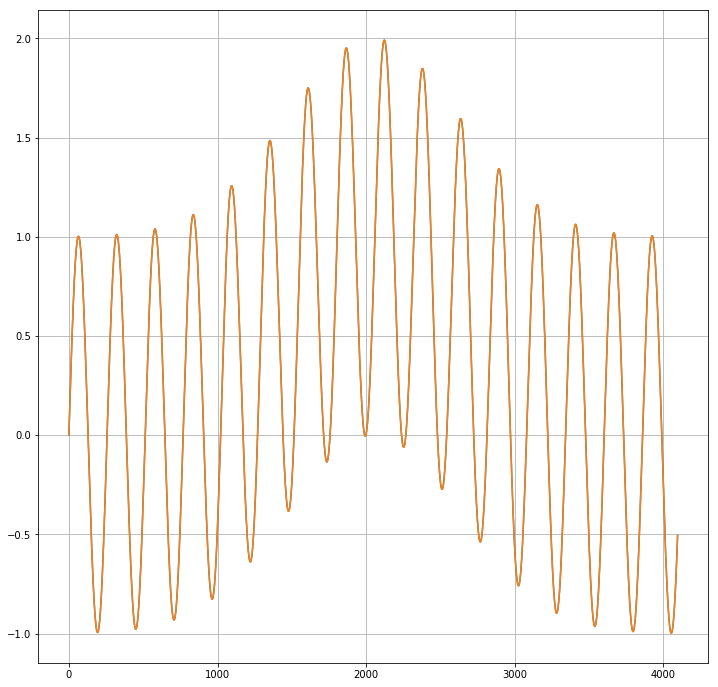

In [1106]:
plt.figure(figsize=(12,12))
plt.plot(y_)
plt.plot(y_rest)
plt.grid()

In [1016]:
order_p = 3
n_range_p = np.arange(-int((order_p+1)/2), \
            order_p-int((order_p+1)/2)+1).astype(np.float32)
n_range_p

array([-2., -1.,  0.,  1.], dtype=float32)

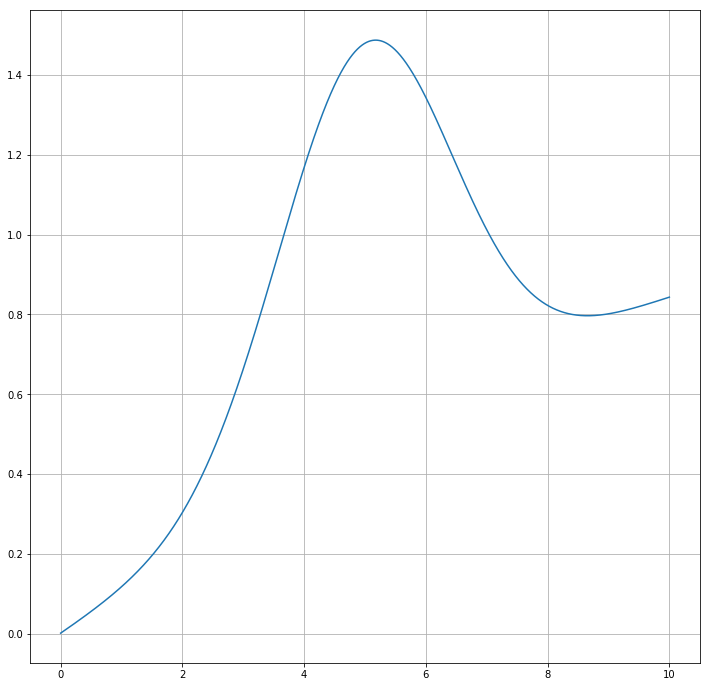

In [1035]:
func = lambda x: np.sin(0.1*x) + np.exp(- 0.25 * ((x-5.)**2) ) 
y_ = func(np.arange(0,10.00001,0.002))
plt.figure(figsize=(12,12))
plt.plot(np.arange(0,10.00001,0.002), y_)
plt.grid()

In [89]:
########################## THE NEWEST ITERATION
def wgh(k0, n_l, n_h):
    array = np.arange(n_l, n_h + 1)
    i0 = array[array != k0].astype(np.float64)
    return np.prod(i0 + 0.5) / np.prod(i0 - k0)

def D_range_corr(idx, n, s, N_range):
    ans = idx + s * (2 * N_range + 1)
    ans = ans + max(0, ans[0]) - ans[0]
    ans = ans + min(n-1, ans[-1]) - ans[-1]
    ans = ((ans[ans >= 0] - idx) / s - 1) / 2
    return ans

def C_range_corr(idx, n, s, N_range):
    ans = idx + s * (2 * N_range + 1)
    ans = ans + max(s, ans[0]) - ans[0]
    ans = ans + min(n-s-1, ans[-1]) - ans[-1]
    ans = ((ans[ans >= 0] - idx) / s - 1) / 2
    return ans
    
def forward_wt(signif, y, jlvl, order_p, order_u):
    y0 = copy.deepcopy(y)
    n_range_p = np.arange(-int((order_p+1)/2), \
                          order_p-int((order_p+1)/2)+1)
    n_range_u = np.arange(-int((order_u+1)/2), \
                          order_u-int((order_u+1)/2)+1)
    ende = len(y)
    y[signif == False] = 0.
    
    for j in range(jlvl-1,0,-1):
        s = 2**(jlvl-j-1)
        D_ind = np.arange(s, ende, 2*s)
        C_ind = np.arange(0, ende, 2*s)
        
        # predict
        for i in D_ind:
            range_corr = D_range_corr(i, ende, s, \
                            n_range_p).astype(np.float64)
            order_corr = len(range_corr) - 1
            for k in range(order_corr+1):
                y[i] = y[i] - y[int(i + (2*range_corr[k]+1)*s)]*\
                    wgh(range_corr[k], range_corr[0], range_corr[-1])
                
        # update
        for i in C_ind:
            range_corr = C_range_corr(i, ende, s, \
                            n_range_u).astype(np.float64)
            order_corr = len(range_corr) - 1
            for k in range(order_corr+1):
                y[i] = y[i] + 0.5*y[int(i+(2*range_corr[k]+1)*s)]*\
                    wgh(range_corr[k], range_corr[0], range_corr[-1])
                
    return y

def inverse_wt(signif, y, jlvl, order_p, order_u):
    n_range_p = np.arange(-int((order_p+1)/2), \
                          order_p-int((order_p+1)/2)+1)
    n_range_u = np.arange(-int((order_u+1)/2), \
                         order_u-int((order_u+1)/2)+1)
    ende = len(y)
    y[signif == False] = 0.
    
    for j in range(1, jlvl):
        s = 2**(jlvl-j-1)
        D_ind = np.arange(s, ende, 2*s)
        C_ind = np.arange(0, ende, 2*s)
        
        # update
        for i in C_ind:
            range_corr = C_range_corr(i, ende, s, \
                            n_range_u).astype(np.float64)
            order_corr = len(range_corr) - 1
            for k in range(order_corr+1):
                y[i] = y[i] - 0.5*y[int(i+(2*range_corr[k]+1)*s)]*\
                    wgh(range_corr[k], range_corr[0], range_corr[-1])
                
        for i in D_ind:
            range_corr = D_range_corr(i, ende, s, \
                            n_range_p).astype(np.float64)
            order_corr = len(range_corr) - 1
            for k in range(order_corr+1):
                y[i] = y[i] + y[int(i+(2*range_corr[k]+1)*s)]*\
                    wgh(range_corr[k], range_corr[0], range_corr[-1])
                
    return y

def get_significance(y, cv, jlvl):
    signif_ = np.zeros((len(y),), dtype=bool)
    for j in range(jlvl-1, 0, -1):
        s = 2**(jlvl-j-1)
        
        D_ind = np.arange(s, len(y), 2*s)
        C_ind = np.arange(0, len(y), 2*s)
        signif_[D_ind] = (np.abs(y[D_ind]) >= cv) | (signif_[D_ind])
        
        if j == 1:
            signif_[C_ind] = True
            
    return signif_

def get_adjust(y, L_sign, jlvl_in, j_max):
    ende = len(y)
    D_present = np.zeros((jlvl_in,), dtype=bool)
    D_present[0] = True
    for j in range(0, jlvl_in-1):
        s = 2**(jlvl_in-j-1)
        
        D_ind = np.arange(s, ende, 2*s)
        D_present[j+1] = True if np.sum(L_sign[D_ind]) > 0 else False
        
    print(D_present)
    jlvl_out = max(jlvl_in-1, min(\
        max([k0 for k0,k in enumerate(D_present) if k==True]), j_max))
    
    y_out, L_out = [], []
    if jlvl_out > jlvl_in:
        s = 2**(jlvl_out-jlvl_in)
        nprd = ende % 2
        ende = int(s * (ende - nprd) + nprd)
        y_out = np.zeros((ende,))
        L_out = np.zeros((ende,), dtype=bool)
        C_ind = np.arange(0, ende, s).astype(int)
        
        y_out[C_ind] = y
        L_out[C_ind] = L_sign
    elif jlvl_out == jlvl_in:
        y_out = y
        L_out = L_in
    elif jlvl_out < jlvl_in:
        s = 2.**(jlvl_in-jlvl_out)
        C_ind = np.arange(0, ende, s).astype(int)

        nprd = ende % 2
        ende = int((ende - nprd) / s + nprd)
        y_out = np.zeros((ende,))
        L_out = np.zeros((ende,), dtype=bool)

        y_out = y[C_ind]
        L_out = L_sign[C_ind]
        
    return y_out, L_out, jlvl_out

def get_adjacent(L_in, jlvl):
    L_adj = copy.deepcopy(L_in)
    ende = len(L_in)
    
    for j in range(jlvl-1, -1, -1):
        s = 2**(jlvl-j)
        
        S_ind = []
        if j == 0:
            S_ind = np.arange(0, ende, s).astype(int)
        else:
            S_ind = np.arange(s, ende, 2*s).astype(int)
            
        S_ind = S_ind[L_in[S_ind]==1]
        
        if len(S_ind) > 0:
            aux_arr = (np.array([-1, 1])*s / 2**(min(j+1, \
                        jlvl)-j)).astype(int)
            for i in aux_arr:
                L_adj[S_ind[(S_ind + i >= 0) & \
                           (S_ind + i < ende)]+i] = True
                
    return L_adj

def reconstruction_check(jlvl, order_p, L_in):
    ende = len(L_in)
    L_out = copy.deepcopy(L_in)
    n_range = np.arange(-int((order_p+1)/2), \
                        order_p-int((order_p+1)/2)+1)
    
    for j in np.arange(jlvl-1, 0, -1):
        s = 2.**(jlvl-j-1)
        
        D_ind = np.arange(s, ende, 2*s).astype(int)
        D_ind = D_ind[np.where(L_out[D_ind]==True)]
        
        for i in D_ind:
            n_range_corr = D_range_corr(i, ende, s, n_range)
            order_corr = len(n_range_corr) - 1
            for k in np.arange(order_corr + 1):
                L_out[int(i + (2*n_range_corr[k]+1)*s)] = \
                    L_out[int(i + (2*n_range_corr[k]+1)*s)] | L_out[int(i)]
                
    return L_out

def adaptive_transform_1d(y, jlvl, order_p, order_u, cv, jmx):
    signif = np.ones((len(y),), dtype=bool)
    y_forw = forward_wt(signif, y, jlvl, order_p, order_u)
    signif = get_significance(y_forw, cv, jlvl)
    y_new, signif, jlvl_new = get_adjust(y, signif, jlvl, jmx)
    L = reconstruction_check(jlvl_new, order_p, signif)
    y_out = inverse_wt(L, y_new, jlvl_new, order_p, order_u)

    return y_out

In [100]:
func = lambda x: (np.sin(100.*x) + np.exp(- 0.25 * ((x-5.)**2) )).astype(np.float64) 
y0_ = func(np.arange(0., 10.001, 10./ 4096.)).astype(np.float64)
y_ = copy.deepcopy(y0_)

jlvl = 5
order_p = 3
order_u = 3
cv = 0.
jmx = 10

y_after = adaptive_transform_1d(y_, jlvl, order_p, order_u, cv, jmx)
print(np.max(y0_), np.max(y_after))

[ True  True  True  True  True]
1.9974802758452963 1.9981319284693246


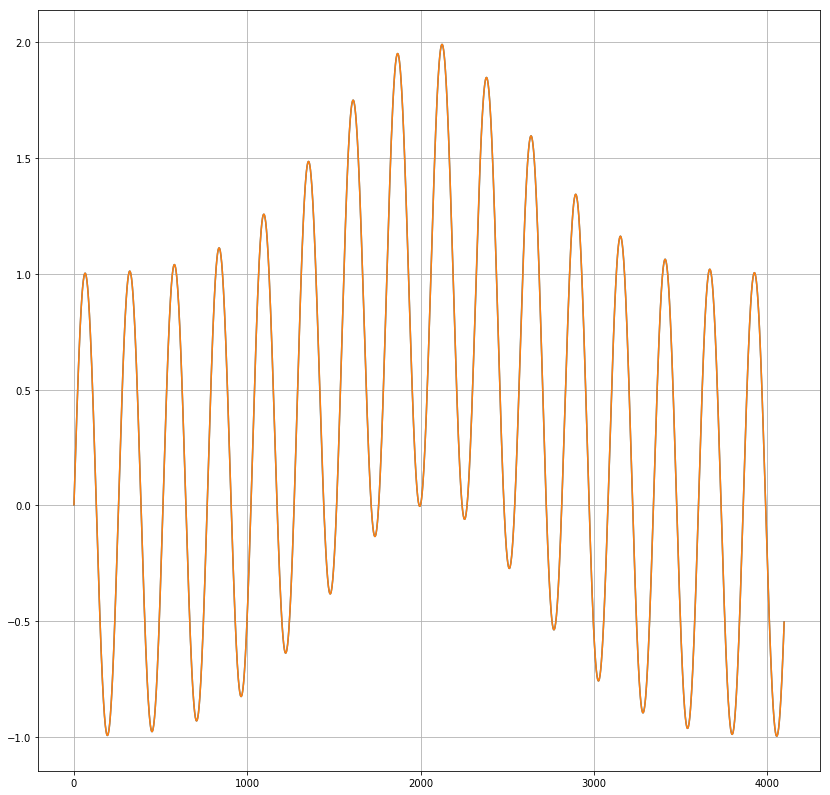

In [91]:
plt.figure(figsize=(14,14))
plt.plot(np.arange(0,4098,2), y_after)
plt.plot(y0_)
plt.grid()
plt.show()

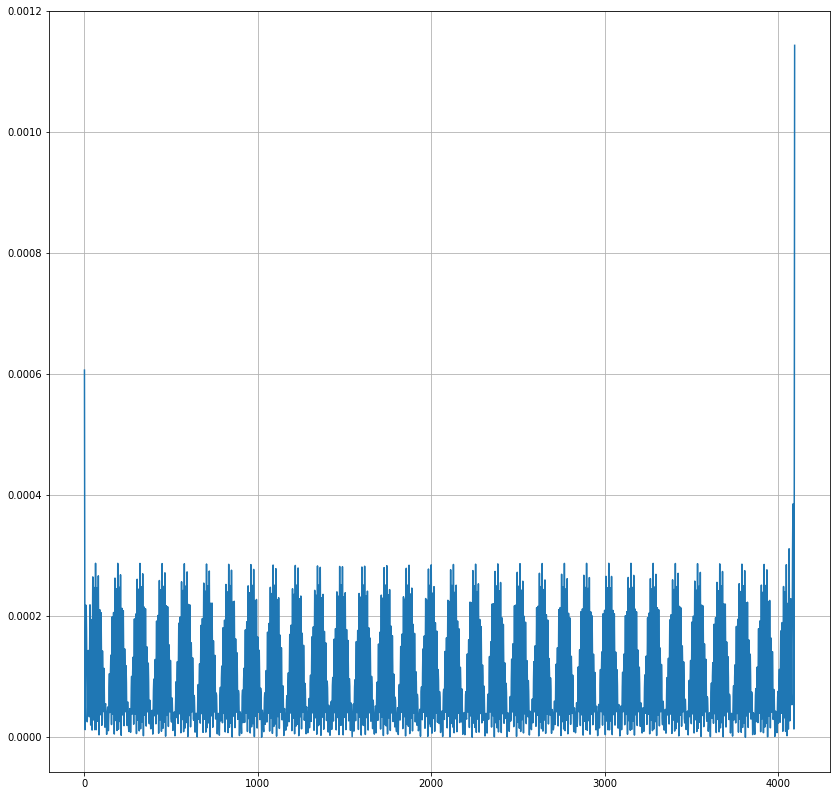

In [25]:
plt.figure(figsize=(14,14))
plt.plot(np.arange(0,4098,2), np.abs(y_after-y0_[::2]))
plt.grid()
#plt.plot(y0_)

In [ ]:
"""
1) прямое преобр на полной сетке, построение маски, расширение маски,
зануление коэф не на маске, обратное преобр на все узлы сетки, 
обратное, ошибка порядка epsilon
Прямое неадаптивное
2) получили маску, кот состоит из значащих и тех, которые прошли проверку восстановления реконструкции, потом делаем адаптивное проебразование на сетке
В других узлах вейвлеты зануляем
Делаем преобразование, сравниваем коэф со случаем неадаптивного преобразования
Разница будет порядка эпсилон
Прямое адаптивное, сравн с неадаптивн
3) Делаем обратное вейвл проебр на адаптивной сетке
точность машинная
4) adapt, inverse neadapt
разница порядка эпсилон


5) сетка сразу адаптивная
1 маска (на ней преобразовнаие делаем)
2 маска (существенные коэффициенты)
расширяем, получаем 3 маску (и проверяем ее на восстановление)

и делаем преобразование на уже адаптированной маске

след задача - растить уровень разрешения

сразу сжатый сигнал хотим получить, вот наша цель
"""

In [37]:
# test 1, forward adaptive, inverse nonadaptive
def compare_with_masks(y1, mask1, y2, mask2):
    return np.max(np.abs(y1[mask1==True] - y2[mask2==True]))

def test1(jlvl, order_p, order_u, cv, jmax, func, x_arr):
    y = func(x_arr)
    y0 = copy.deepcopy(y)
    signif = np.ones((len(y),), dtype=bool)
    y_forw = forward_wt(signif, y, jlvl, order_p, order_u)
    signif = get_significance(y_forw, cv, jlvl)
    y_new, signif, jlvl_new = get_adjust(y, signif, jlvl, jmx)
    L = reconstruction_check(jlvl_new, order_p, signif)
    y_out = inverse_wt(L, y_new, jlvl_new, order_p, order_u)

    c_inf = np.max(np.abs(y_out-y))
    return с_inf


In [38]:
func = lambda x: (np.sin(10.*x) + np.exp(- 0.25 * ((x-5.)**2) )).astype(np.float64) 
x_arr = np.arange(0., 10.001, 10./ 4096.).astype(np.float64)

jlvl = 5
order_p = 3
order_u = 3
cv = 0.01
jmax = 7

test1(jlvl, order_p, order_u, cv, jmax, func, x_arr)

[ True  True False False False]


ValueError: operands could not be broadcast together with shapes (2049,) (4097,) 

In [86]:
################ NEW ITERATION
def wgh(k00, n_l, n_h):
    array = np.arange(n_l, n_h + 1)
    i0 = array[array != k00].astype(np.float64)
    return np.prod(i0 + 0.5) / np.prod(i0 - k00)

def D_correct(idx, n, s, N_range):
    corrected = idx + (2 * N_range + 1) * s
    corrected = corrected + max(0, corrected[0]) - corrected[0]
    corrected = corrected + min(n-1, corrected[-1]) - corrected[-1]
    corrected = ((corrected[corrected >= 0] - idx) / s - 1) / 2
    return corrected

def C_correct(idx, n, s, N_range):
    corrected = idx + (2 * N_range + 1) * s
    corrected = corrected + max(s, corrected[0]) - corrected[0]
    corrected = corrected + min(n-s-1, corrected[-1]) - corrected[-1]
    corrected = ((corrected[corrected >= 0] - idx) / s - 1) / 2
    return corrected

def prepare_D_C_idx(s0, ende0, L_in0):
    D_ind = np.arange(s0, ende0, 2*s0)
    C_ind = np.arange(0, ende0, 2*s0)

    D_ind = D_ind[L_in0[D_ind]==True]
    C_ind = C_ind[L_in0[C_ind]==True]
    return D_ind, C_ind

def forward_wt(y, jlvl, L_in, order_p, order_u):
    ende = len(y)
    range_p = np.arange(-int((order_p+1)/2),\
                        order_p-int((order_p+1)/2)+1).astype(np.float64)
    range_u = np.arange(-int((order_u+1)/2),\
                        order_u-int((order_u+1)/2)+1).astype(np.float64)
    y[L_in==False] = 0.

    for j in range(jlvl-1, 0, -1):
        s = 2**(jlvl-j-1)
        
        #D_ind, C_ind = prepare_D_C_idx(s, ende, L_in)
        D_ind = np.arange(s, ende, 2*s)
        C_ind = np.arange(0, ende, 2*s)
        
        # predict
        for i in D_ind:
            range_corr = D_correct(i, ende, s, range_p).astype(np.float64)
            order_corr = len(range_corr) - 1
            for k in range(order_corr + 1):
                y[i] = y[i] - y[int(i + (2*range_corr[k]+1)*s)] * \
                        wgh(range_corr[k], range_corr[0], \
                            range_corr[-1])
            
        # update
        for i in C_ind:
            range_corr = C_correct(i, ende, s, range_u).astype(np.float64)
            order_corr = len(range_corr) - 1
            for k in range(order_corr + 1):
                y[i] = y[i] + 0.5*y[int(i + (2*range_corr[k]+1)*s)] * \
                        wgh(range_corr[k], range_corr[0], \
                            range_corr[-1])
    return y

def inverse_wt(y, jlvl, L_in, order_p, order_u):
    yr = copy.deepcopy(y)
    ende = len(yr)
    range_p = np.arange(-int((order_p+1)/2),\
                        order_p-int((order_p+1)/2)+1).astype(np.float64)
    range_u = np.arange(-int((order_u+1)/2),\
                        order_u-int((order_u+1)/2)+1).astype(np.float64)
    y[L_in==False] = 0.
    
    for j in range(1, jlvl):
        #jlvl-1, 0, -1):
        s = 2**(jlvl-j-1)
        
        #D_ind, C_ind = prepare_D_C_idx(s, ende, L_in)
        D_ind = np.arange(s, ende, 2*s)
        C_ind = np.arange(0, ende, 2*s)

        max_c = np.max(yr)
        # update
        for i in C_ind:
            range_corr = copy.deepcopy(\
                    C_correct(i, ende, s, range_u).astype(np.float64))
            order_corr = len(range_corr) - 1
            for k in range(order_corr + 1):
                yr[i] = yr[i] - 0.5*yr[int(i + (2*range_corr[k]+1)*s)] * \
                        copy.deepcopy(wgh(range_corr[k], range_corr[0], \
                            range_corr[-1]))
                
        # predict
        for i in D_ind:
            range_corr = copy.deepcopy(
                D_correct(i, ende, s, range_p).astype(np.float64))
            order_corr = len(range_corr) - 1
            for k in range(order_corr + 1):
                yr[i] = yr[i] + yr[int(i + (2*range_corr[k]+1)*s)] * \
                        copy.deepcopy(wgh(range_corr[k], range_corr[0], \
                           range_corr[-1]))
    return yr

def get_significance(y, eps, jlvl):
    L_sig = np.zeros((len(y),), dtype=bool)
    ende_ = len(y)
    
    for j in range(jlvl-1, 0, -1):
        s = 2**(jlvl-j-1)
        
        #D_ind, C_ind = prepare_D_C_idx(s, ende, L_in)
        D_ind = np.arange(s, ende_, 2*s)
        C_ind = np.arange(0, ende_, 2*s)

        L_sig[D_ind] = (np.abs(y[D_ind]) > eps) | (L_sig[D_ind])
        
        if j == 1:
            L_sig[C_ind] = True
            
    return L_sig

def adjust_lvl(y, L_sig, jlvl, jmax):
    ende = len(y)
    D_present = np.zeros((jlvl,), dtype=bool)
    D_present[0] = True
    
    for j in range(jlvl-1):
        s = 2**(jlvl-j-1)
        D_ind = np.arange(s, ende, 2*s)
        D_present[j+1] = True if np.sum(L_sig[D_ind] > 0) else False
        
    jlvl_new = max(jlvl-1, min(max(\
            [k0 for k0,k in enumerate(D_present) if k==True])+1, jmax))
    
    y_out, L_out = [], []
    if jlvl_new > jlvl:
        s = 2.**(jlvl_new - jlvl)
        nprd = ende % 2
        ende = int(s*(ende - nprd) + nprd)
        
        y_out = np.zeros((ende,))
        L_out = np.zeros((ende,), dtype=bool)
        
        C_ind = np.arange(0, ende, s).astype(int)
        
        y_out[C_ind] = y
        L_out[C_ind] = L_sig
        
    elif jlvl_new == jlvl:
        y_out = copy.deepcopy(y)
        L_out = copy.deepcopy(L_sig)
        
    elif jlvl_new < jlvl:
        s = 2.**(jlvl - jlvl_new)
        C_ind = np.arange(0, ende, s).astype(int)
        
        nprd = ende % 2
        ende = int((ende - nprd) / s + nprd)
        y_out = np.zeros((ende,))
        L_out = np.zeros((ende,), dtype=bool)
        
        y_out = y[C_ind]
        L_out = L_sig[C_ind]
        
    return y_out, L_out, jlvl_new

def add_adjacent(L_sig, jlvl):
    ende = len(L_sig)
    L_adj = copy.deepcopy(L_sig)
    
    for j in range(jlvl-1, 0, -1):
        s = 2**(jlvl-j)
        
        S_ind = []
        if j == 1:
            S_ind = np.arange(0, ende, s)
        else:
            S_ind = np.arange(s, ende, 2*s)
        S_ind = S_ind[np.where(L_sig[S_ind]==True)]
            
        # reconstruction check
        if len(S_ind) > 0:
            array = np.array([-1., 1.])
            array = (array * s / 2.**(min(j+1, jlvl) - j)).astype(int)
            
            for i in array:
                L_adj[S_ind[(S_ind + i >= 0) & \
                           (S_ind + i < ende)] + i] = True
    return L_adj

def reconstruction_check(jlvl, order_p, L_sig):
    ende = len(L_sig)
    L_out = copy.deepcopy(L_sig)
    
    range_p = np.arange(-int((order_p+1)/2),\
                        order_p-int((order_p+1)/2)+1)

    for j in range(jlvl-1, 0, -1):
        s = 2**(jlvl-j-1)
        
        D_ind = np.arange(s, ende, 2*s).astype(int)
        D_ind = D_ind[np.where(L_out[D_ind]==True)]

        for i in D_ind:
            range_corr = D_correct(i, ende, s, range_p)
            order_corr = len(range_corr) - 1
            for k in range(order_corr + 1):
                L_out[int(i + (2*range_corr[k]+1)*s)] = \
                    L_out[int(i + (2*range_corr[k]+1)*s)] | L_out[i]
                
    return L_out

def adaptive_wt(y_, jlvl, jmax, order_p, order_u, eps):
    L_in = np.ones((len(y_),), dtype=bool)
    y_ = forward_wt(copy.deepcopy(y_), jlvl, \
                    copy.deepcopy(L_in), order_p, order_u)
    L_sig = get_significance(y_, eps, jlvl)
    y_out, L_out, jlvl_new = adjust_lvl(y_, L_sig, jlvl, jmax)
    
    L_sig = add_adjacent(L_out, jlvl_new)
    L = reconstruction_check(jlvl_new, order_p, L_sig)

    print(np.max(y_), np.max(y_out))
    y_new = inverse_wt(y_out, jlvl_new, L, order_p, order_u)
    print(np.max(y_), np.max(y_out), np.max(y_new))
    
    return y_new

In [87]:
x_ = np.arange(0., 10.001, 10./ 4096.)
func = lambda x: (np.sin(100.*x) + \
                  np.exp(- 0.25 * ((x-5.)**2) )).astype(np.float64) 
y0_ = func(x_).astype(np.float64)
y_ = copy.deepcopy(y0_)

jlvl = 5
order_p = 3
order_u = 3
eps = 0
jmx = 6

y_after = adaptive_wt(y_, jlvl, jmx, order_p, order_u, eps)

2.236524362450128 2.236524362450128
2.236524362450128 2.236524362450128 1.9974802758452959


In [44]:
2.236524362450128 2.236524362450128
2.236524362450128 2.236524362450128
2.236524362450128 1.9974802758452959 1.9974802758452959

(4097, 4097)

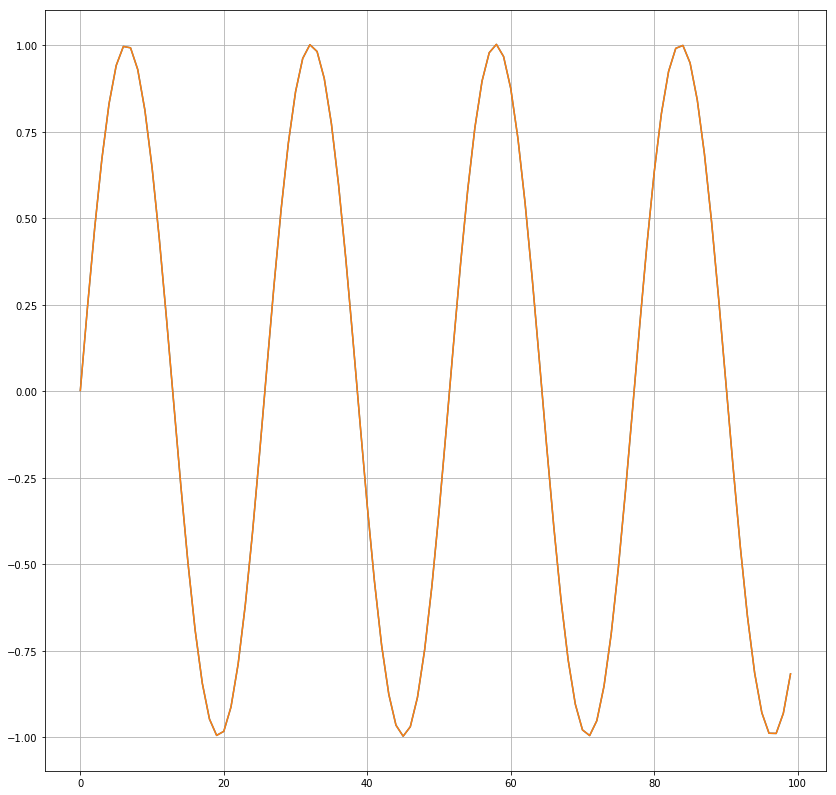

In [62]:
plt.figure(figsize=(14,14))
plt.plot(y0_[:100])
plt.plot(y_after[:100])
plt.grid()
plt.show()

In [ ]:
################### NEWEST ITERATION
def wgh(k0, n_l, n_h):
    array = np.arange(n_l, n_h + 1)
    i0 = array[array != k0].astype(np.float64)
    return np.prod(i0 + 0.5) / np.prod(i0 - k0)

def D_correct(idx, n, s, N_range):
    corrected = idx + s * (2 * N_range + 1)
    corrected = corrected + max(0, corrected[0]) - corrected[0]
    corrected = corrected + min(n-1, corrected[-1]) - corrected[-1]
    corrected = ((corrected[corrected >= 0] - idx)/s-1)/2
    return copy.deepcopy(corrected)
    
def C_correct(idx, n, s, N_range):
    corrected = idx + s * (2 * N_range + 1)
    corrected = corrected + max(s, corrected[0]) - corrected[0]
    corrected = corrected + min(n-s-1, corrected[-1]) - corrected[-1]
    corrected = ((corrected[corrected >= 0] - idx)/s-1)/2
    return copy.deepcopy(corrected)

def forward_wt(y, jlvl, order_p, order_u, L_in):
    ende = len(y)
    n_range_p = np.arange(-int((order_p+1)/2), order_p-\
                          int((order_p+1)/2)+1)
    n_range_u = np.arange(-int((order_u+1)/2), order_u-\
                          int((order_u+1)/2)+1)
    
    y[L_in==False] = 0.
    for j in range(jlvl-1, 0, -1):
        s = 2.**(jlvl-j-1)
        D_ind = np.arange(s, ende, 2*s)
        C_ind = np.arange(0, ende, 2*s)
        
        D_ind = D_ind[L_in[D_ind]==True]
        C_ind = C_ind[L_in[C_ind]==True]
        
        # predict
        for i in D_ind:
            range_corr = D_correct(i, ende, s, n_range_p)
            order_corr = len(range_corr) - 1
            for k in range(order_corr + 1):
                y[i] = y[i] - y[int(i+s*(2*range_corr[k]+1))] * \
                        wgh(range_corr[k], range_corr[0], range_corr[-1])
            
        # update
        for i in C_ind:
            range_corr = C_correct(i, ende, s, n_range_u)
            order_corr = len(range_corr) - 1
            for k in range(order_corr + 1):
                y[i] = y[i] + 0.5*y[int(i+s*(2*range_corr[k]+1))] * \
                        wgh(range_corr[k], range_corr[0], range_corr[-1])
                
    return y